<a href="https://colab.research.google.com/github/sathvikb007/Image-Clustering-with-Autoencoders/blob/Branch1/convolutionalAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import *
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from keras.optimizers import RMSprop
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np
import tensorflow as tf


Using TensorFlow backend.


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.3650 - val_loss: 0.3335
Epoch 2/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.3021 - val_loss: 0.2997
Epoch 3/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.2922 - val_loss: 0.2936
Epoch 4/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2879 - val_loss: 0.2991
Epoch 5/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2844 - val_loss: 0.2884
Epoch 6/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2825 - val_loss: 0.2838
Epoch 7/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2805 - val_loss: 0.2814
Epoch 8/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2791 - val_loss: 0.2803
Epoch 9/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2779 - val_loss: 0.2

In [0]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0   

In [0]:
encoder = Model(input_img, encoded)

In [0]:
encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0   

In [0]:
CAE_encoded_imgs_train = encoder.predict(x_train)
CAE_decoded_imgs_train = autoencoder.predict(x_train)

CAE_encoded_imgs_test = encoder.predict(x_test)
CAE_decoded_imgs_test = autoencoder.predict(x_test)

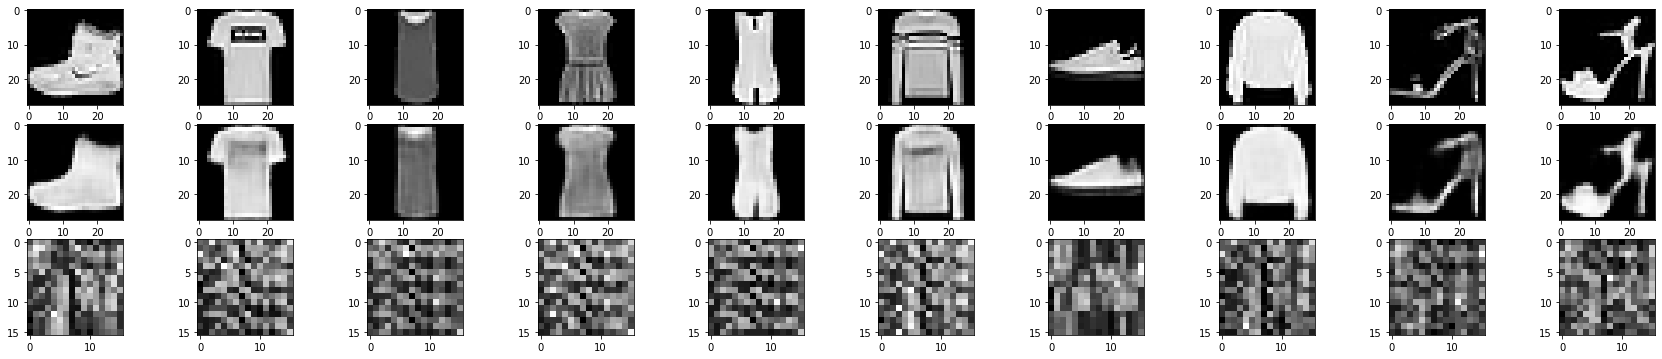

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(30,6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.gray()
    plt.imshow(x_train[i].reshape(28, 28))
    
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(CAE_decoded_imgs_train[i].reshape(28, 28))

    #display latent representation
    ax = plt.subplot(3, n, i+1+ n*2)
    plt.imshow(CAE_encoded_imgs_train[i].reshape(16,16))
   
plt.show()

In [0]:
CAE_encoded_imgs_train = CAE_encoded_imgs_train.reshape(60000,256)
CAE_encoded_imgs_test = CAE_encoded_imgs_test.reshape(10000,256)

In [0]:
print(CAE_encoded_imgs_train.shape)
print(CAE_encoded_imgs_test.shape)

(60000, 256)
(10000, 256)


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(CAE_encoded_imgs_train)
X_test  = sc.transform(CAE_encoded_imgs_test)

In [0]:
from sklearn.cluster import KMeans
CAEkmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)

In [0]:
CAEkmeans.inertia_/(60000*128)

0.9542177155625957

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(CAE_encoded_imgs_train)
ypredenc = kmeans.predict(CAE_encoded_imgs_train).tolist()
#y_train = y_train.reshape(60000,).tolist()

In [0]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_train, ypredenc))

NameError: ignored

In [0]:
metrics.adjusted_rand_score([4, 4, 6, 9], [2, 2, 3, 4])

1.0

In [0]:
metrics.adjusted_rand_score([8, 4, 6, 4], [3, 2, 3, 1])

-0.19999999999999998